<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/fasle2class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from numpy import float32
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype(float32)/255

In [ ]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,num_classes=10)
test_labels=to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers
from keras.activations import softmax,relu
model=models.Sequential()
model.add(layers.Input(shape=(28*28,),name='input_layer'))
model.add(layers.Dense(512,activation=relu,name='prelogics'))
model.add(layers.Dense(10,activation=softmax,name='logics'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prelogics (Dense)           (None, 512)               401920    
                                                                 
 logics (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.losses import categorical_crossentropy
#from keras.optimizers import rmsprop

model.compile(optimizer='rmsprop',loss=categorical_crossentropy,metrics='accuracy')
history=model.fit(train_images,train_labels,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0304 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0130 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0094 - accuracy: 0.9977


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

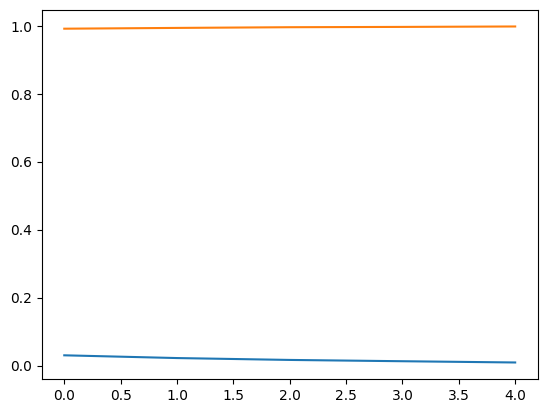

In [ ]:
import matplotlib.pyplot as plt

loss=history.history['loss']
accuracy=history.history['accuracy']
plt.plot(loss)
plt.plot(accuracy)
plt.show()

In [ ]:
eva_loss,eva_accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0634 - accuracy: 0.9818


[0.06340469419956207, 0.9818000197410583]

In [ ]:
predict_labels=model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [1]:
import numpy as np

In [8]:
x=np.array(12)
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))


0
0
int64
()
()


In [9]:
x=np.array([1,2,3,4,5])
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

1
1
int64
(5,)
(5,)


In [11]:
x=np.array([[1,2,3,4,5],
            [2,3,4,5,6],
            [3,4,5,6,7]],dtype='int8')
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

2
2
int8
(3, 5)
(3, 5)


In [12]:
x=np.array([[[1,2,3,4,5],
             [2,3,4,5,6],
             [2,3,4,5,6]],
            [[2,3,4,5,6],
             [3,4,5,6,7],
             [4,5,6,7,8]]])
print(x.ndim)
print(np.ndim(x))

print(x.dtype)
#print(np.dtype(x))

print(x.shape)
print(np.shape(x))

3
3
int64
(2, 3, 5)
(2, 3, 5)


# access to data

In [16]:
x[0,1,2]
#OR
x[0][1][2]
#All result is same

4

In [18]:
print(train_images.ndim)
print(train_images.dtype)
print(train_images.shape)

3
uint8
(60000, 28, 28)


In [19]:
train_images[200,10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253,
       254, 253, 169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [22]:
#tensor slicing
my_slice=train_images[10:100]
print(my_slice.shape)
my_slice2=train_images[:,7:-7,7:-7]
print(my_slice2.shape)

(90, 28, 28)
(60000, 14, 14)


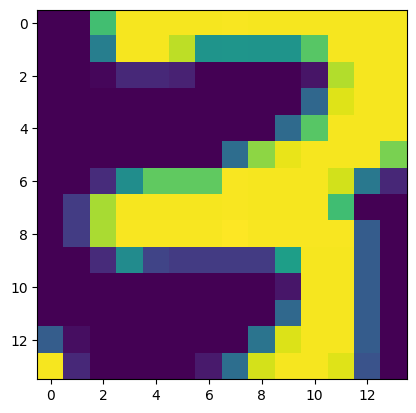

In [24]:
import matplotlib.pyplot as plt
plt.imshow(my_slice2[7])

In [39]:
#data batches
batch=train_images[:128]
batch=train_images[128:256]

'batch1'

In [44]:

from keras.utils.tf_utils import convert_variables_to_tensors
batch_size=128
for n in range(round(len(train_images)/batch_size)):
  exec(f'batch_{n}=train_images[128*n:128*(n+1)]')

# ❑ Vector data—2D tensors of shape
 (samples, features)
# ❑ Timeseries data or sequence data—3D tensors of shape 
 (samples,timesteps, features)
# ❑ Images—4D tensors of shape
 (samples, height, width,channels) or
 (samples, channels, height, width)
# ❑ Video—5D tensors of shape
 (samples, frames, height, width,channels) or
 (samples, frames, channels, height, width)

In [ ]:
a=np.array([1,2,4])
